In [1]:
import bet.postProcess.compareP as compP
from bet.helpers import *
import matplotlib.pyplot as plt

# Define and Preview Sets

In [2]:
num_samples_left = 50
num_samples_right = 50
delta = 0.5 # width of measure's support
L = unit_center_set(2, num_samples_left, delta)
R = unit_center_set(2, num_samples_right, delta)

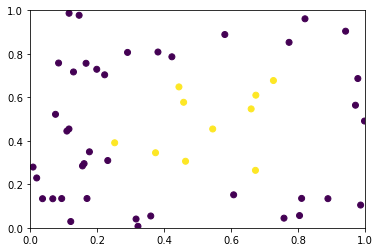

In [3]:
plt.scatter(L._values[:,0], L._values[:,1], c=L._probabilities)
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

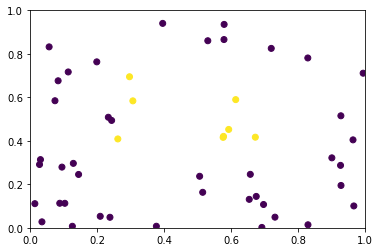

In [4]:
plt.scatter(R._values[:,0], R._values[:,1], c=R._probabilities)
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

# Define Metric
Also, show values

In [5]:
num_integration_samples = 2000 
mm = compP.compare(L, R, num_integration_samples) # initialize metric

In [6]:
# mm.get_left().get_values()

In [7]:
# mm.get_right().get_values()

# Clip and compare

We are going to create a `comparison` object which contains sets that are proper subsets of the original (we will be dividing the number of samples in half). However, since the Voronoi cells that are implicitly defined and consitute the $\sigma$-algebra are going to be fundamentally different, we observe that the two densities reflect the differences in geometry. 

Our chosen densities are uniform and centered in the middle of the domain. The integration sample set is copied during the clipping procedure by default, but can be changed by passing `copy=False` to `clip` if you prefer the two comparisons are linked.

In [8]:
# cut both sample sets in half
mc = mm.clip(num_samples_left//2,num_samples_right//2)

In [9]:
# mc.get_left().get_values()

In [10]:
# mc.get_right().get_values()

Observe how these are distinctly different objects in memory:

In [11]:
mm, mc

(<bet.postProcess.compareP.comparison at 0x7fb400101cc0>,
 <bet.postProcess.compareP.comparison at 0x7fb3fbf49e48>)

# Density Emulation
We will now estimate the densities on the two comparison objects (remember, one is a clipped version of the other, but they share the same `integration_sample_set`).

In [12]:
ld1,rd1 = mm.estimate_density()

In [13]:
I = mc.get_int().get_values()

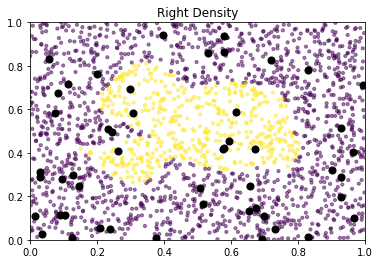

In [14]:
plt.scatter(I[:,0], I[:,1], c=rd1,s =10, alpha=0.5)
plt.scatter(R._values[:,0], R._values[:,1], marker='o', s=50, c='k')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("Right Density")
plt.show()

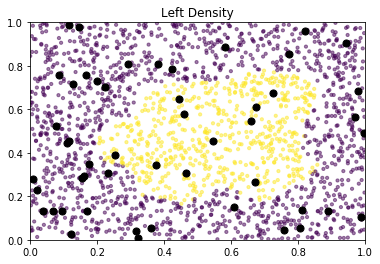

In [15]:
plt.scatter(I[:,0], I[:,1], c=ld1, s=10, alpha=0.5)
plt.scatter(L._values[:,0], L._values[:,1], marker='o', s=50, c='k')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("Left Density")
plt.show()

## Clipped

In [16]:
ld2,rd2 = mc.estimate_density()

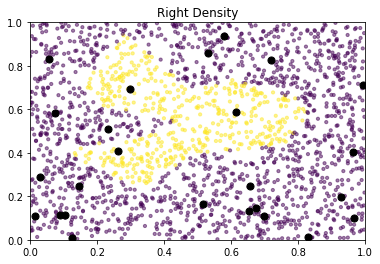

In [17]:
plt.scatter(I[:,0], I[:,1], c=rd2,s =10, alpha=0.5)
plt.scatter(mc.get_right()._values[:,0],
            mc.get_right()._values[:,1], 
            marker='o', s=50, c='k')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("Right Density")
plt.show()

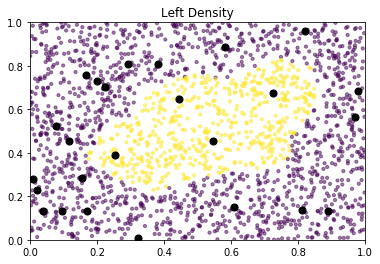

In [18]:
plt.scatter(I[:,0], I[:,1], c=ld2, s=10, alpha=0.5)
plt.scatter(mc.get_left()._values[:,0], 
            mc.get_left()._values[:,1], 
            marker='o', s=50, c='k')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("Left Density")
plt.show()

# Interactive Demonstration of `compP.density`
This will require `ipywidgets`. It is a minimalistic example of using the density method without the comparison class. 


In [19]:
import ipywidgets as wd

In [20]:
def show_clip(samples=100, delta=0.5):
    np.random.seed(int(121))
    S = unit_center_set(2, samples, delta)
    compP.density(S)
    plt.figure()
    plt.scatter(S._values[:,0], S._values[:,1], 
                c=S._density.ravel())
    plt.show()

In [21]:
wd.interact(show_clip, samples=(20,500), delta=(0.05,1,0.05))

interactive(children=(IntSlider(value=100, description='samples', max=500, min=20), FloatSlider(value=0.5, des…

<function __main__.show_clip(samples=100, delta=0.5)>

Below, we show an example of using the comparison object to get a better picture of the sets defined above.

In [22]:
import scipy.stats as sstats

In [23]:
def show_clipm(samples=100, delta=0.5):
    np.random.seed(int(121))
    S = unit_center_set(2, samples, delta)
    
    # alternative probabilities
#     xprobs = sstats.distributions.norm(0.5, delta).pdf(S._values[:,0])
#     yprobs = sstats.distributions.norm(0.5, delta).pdf(S._values[:,1])
#     probs = xprobs*yprobs
#     S.set_probabilities(probs*S._volumes)
    
    I = mm.get_int()
    m = compP.comparison(I,S,None)
    m.estimate_density_left()
    plt.figure()
    plt.scatter(I._values[:,0], I._values[:,1], 
                c=S._emulated_density.ravel())
    plt.scatter([0.5], [0.5], marker='x')
    plt.show()

In [24]:
wd.interact(show_clipm, samples=(20,500), delta=(0.1,1,0.05))

interactive(children=(IntSlider(value=100, description='samples', max=500, min=20), FloatSlider(value=0.5, des…

<function __main__.show_clipm(samples=100, delta=0.5)>

# Suggested Changes

Change `num_integration_samples` at the [top](#Define-Metric) of the notebook, then re-run the notebook. Try changing the values of `delta` both above and in the interactive examples. Notice how our approximation error is more pronouned when `delta` is large.

Try setting `S._probabilities` with `S.set_probabilities()` to something non-uniform.

Try passing `S.clip(samples//2)` as the second argument to `compP.comparison` in the second interactive example and either replacing `estimate_density_left` with `estimate_density` or simply adding `estimate_density_right()` below. Plot the resulting right density estimate either as a separate subplot or on the same axes.